<a href="https://colab.research.google.com/github/jordanbell2357/signal-processing/blob/main/FourierTransform_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian density functions

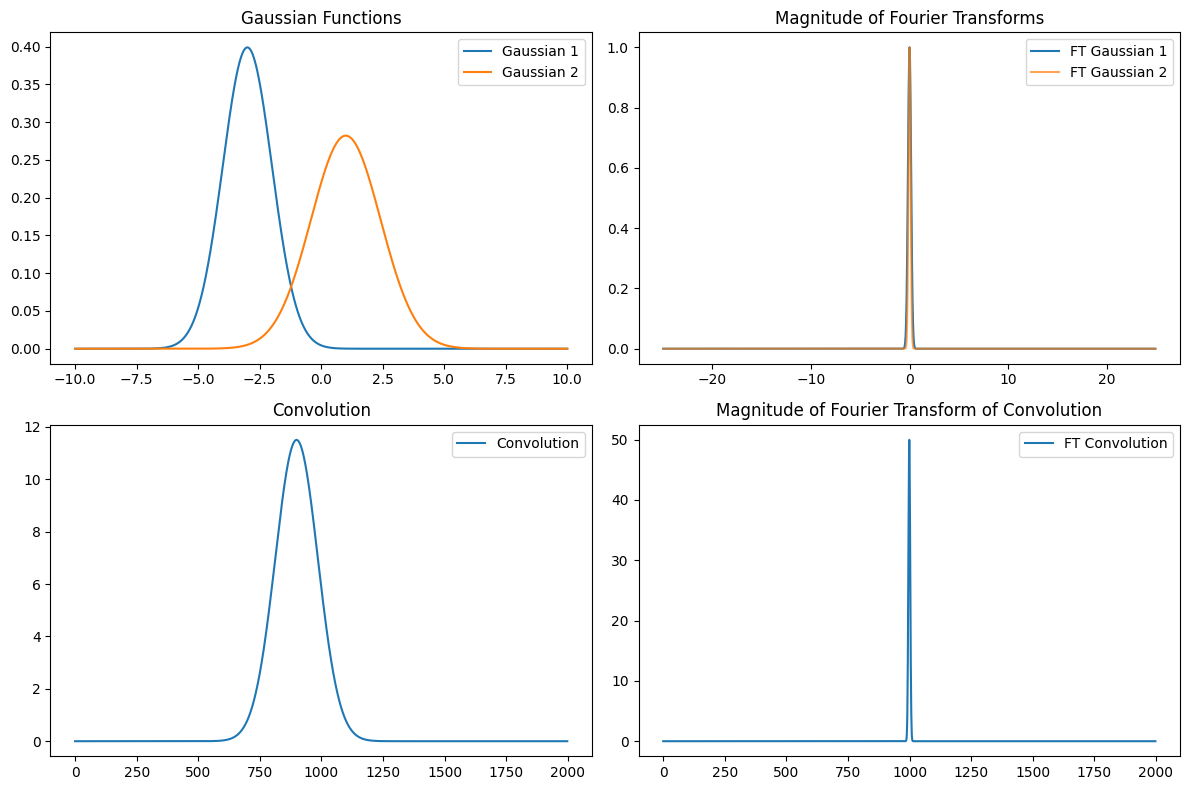

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.fftpack import fft, fftfreq, fftshift

# Gaussian density function
def gaussian(x, mu, sigma):
    return (1.0 / (sigma * np.sqrt(2.0 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Fourier transform (normalized)
def fourier_transform(y, dx):
    ft = fft(y) * dx
    freq = fftfreq(y.size, dx)
    return fftshift(ft), fftshift(freq)

# Time domain
x = np.linspace(-10, 10, 1000)
dx = x[1] - x[0]

# Gaussian functions
f1 = gaussian(x, -3, 1)
f2 = gaussian(x, 1, np.sqrt(2))

# Fourier transforms
F1, freq = fourier_transform(f1, dx)
F2, _ = fourier_transform(f2, dx)

# Convolution and its Fourier transform
conv = convolve(f1, f2, mode='full')
Conv, _ = fourier_transform(conv, dx)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, f1, label='Gaussian 1')
plt.plot(x, f2, label='Gaussian 2')
plt.legend()
plt.title('Gaussian Functions')

plt.subplot(2, 2, 2)
plt.plot(freq, np.abs(F1), label='FT Gaussian 1', alpha=1)
plt.plot(freq, np.abs(F2), label='FT Gaussian 2', alpha=0.7)
plt.legend()
plt.title('Magnitude of Fourier Transforms')

plt.subplot(2, 2, 3)
plt.plot(conv, label='Convolution')
plt.legend()
plt.title('Convolution')

plt.subplot(2, 2, 4)
plt.plot(np.abs(Conv), label='FT Convolution')
plt.legend()
plt.title('Magnitude of Fourier Transform of Convolution')

plt.tight_layout()
plt.show()


# sinc

In [ ]:
# Define the rect function
def rect(x):
    return np.where(np.abs(x) <= 0.5, 1, 0)

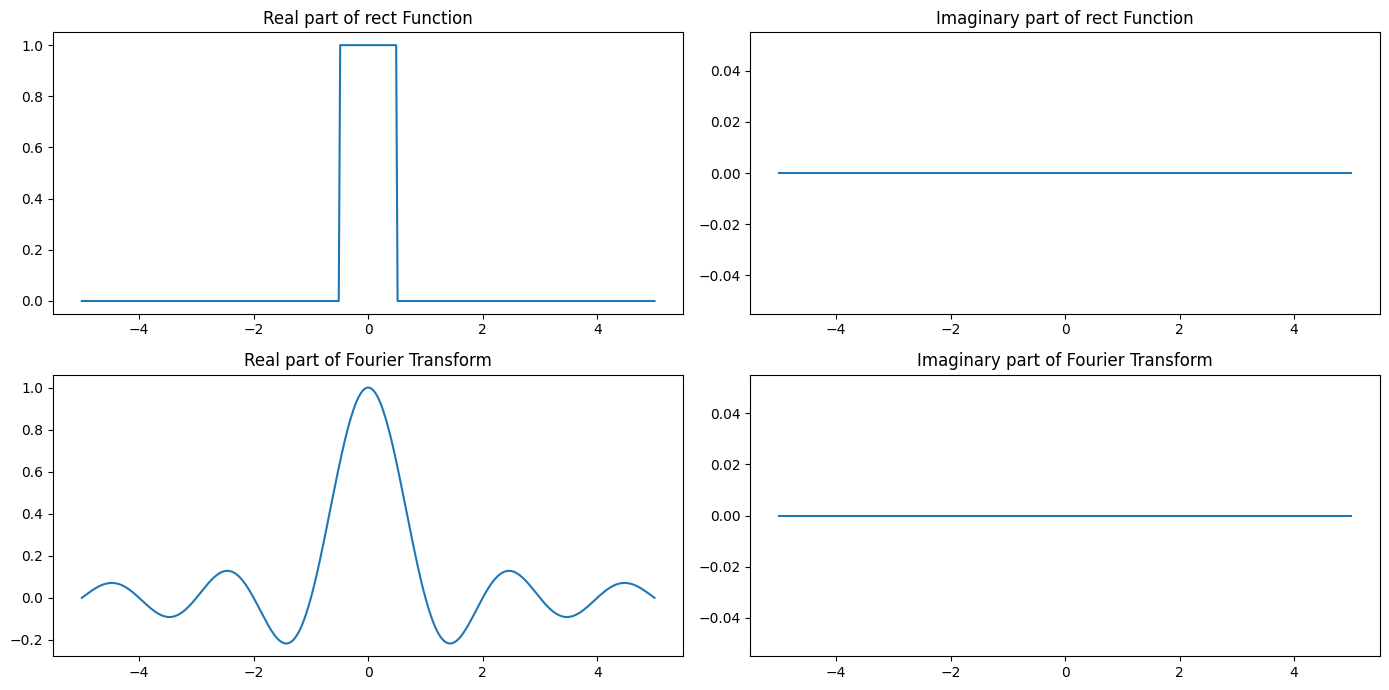

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Define the rectangle function
def rect(x):
    return np.where(np.abs(x) < 0.5, 1, 0)

# Define the Fourier transform
def fourier_transform(f, k):
    integrand = lambda x: f(x) * np.exp(-2j * np.pi * k * x)
    integral, error = integrate.quad(lambda x: np.real(integrand(x)), -np.inf, np.inf)
    return integral

# Define k values
k_values = np.linspace(-5, 5, num=400)

# Evaluate rectangle function
rect_values = rect(k_values)

# Evaluate Fourier transform
fourier_rect_values = np.array([fourier_transform(rect, k) for k in k_values])

# Plot
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
plt.plot(k_values, rect_values.real, label='Real part')
plt.title('Real part of rect Function')

plt.subplot(2, 2, 2)
plt.plot(k_values, np.zeros_like(rect_values), label='Imaginary part')
plt.title('Imaginary part of rect Function')

plt.subplot(2, 2, 3)
plt.plot(k_values, fourier_rect_values.real, label='Real part')
plt.title('Real part of Fourier Transform')

plt.subplot(2, 2, 4)
plt.plot(k_values, fourier_rect_values.imag, label='Imaginary part')
plt.title('Imaginary part of Fourier Transform')

plt.tight_layout()
plt.show()